<a href="https://colab.research.google.com/github/aa23amd/NOAA-DATASET-CSV/blob/main/xgboost_implementation_on_NOAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 mounting drive and Data loading

In [18]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Load the data (Adjust the path if necessary)
file_path = '/content/drive/MyDrive/NOAA data from 2020 to 2025.csv'
df = pd.read_csv(file_path)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])
print("Original Data (First 5 rows):")
print(df.head())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Original Data (First 5 rows):
        date datatype            station attributes  value
0 2020-01-01     PRCP  GHCND:AE000041196      D,,S,      0
1 2020-01-01     TAVG  GHCND:AE000041196      H,,S,    211
2 2020-01-01     TMIN  GHCND:AE000041196       ,,S,    168
3 2020-01-01     PRCP  GHCND:AEM00041194       ,,S,      0
4 2020-01-01     TAVG  GHCND:AEM00041194      H,,S,    217


FILTERING DATA

In [19]:
# Filter Data (TAVG)
df_tavg = df[df['datatype'] == 'TAVG']
print("\nFiltered Data (TAVG - First 5 rows):")
print(df_tavg.head())


Filtered Data (TAVG - First 5 rows):
        date datatype            station attributes  value
1 2020-01-01     TAVG  GHCND:AE000041196      H,,S,    211
4 2020-01-01     TAVG  GHCND:AEM00041194      H,,S,    217
5 2020-01-01     TAVG  GHCND:AEM00041217      H,,S,    205
6 2020-01-01     TAVG  GHCND:AEM00041218      H,,S,    199
9 2020-01-01     TAVG  GHCND:AFM00040938      H,,S,     54


data filtration for average temparature

Aggregating to daily averages

In [20]:
# Aggregate to Daily Averages
df_daily = df_tavg.groupby('date')['value'].mean().reset_index()
df_daily.rename(columns={'value': 'Temperature'}, inplace=True)
df_daily.set_index('date', inplace=True)
print("\nDaily Aggregated Data (First 5 rows):")
print(df_daily.head())




Daily Aggregated Data (First 5 rows):
            Temperature
date                   
2020-01-01   159.911243
2021-01-01   164.139535
2022-01-01   183.375723
2023-01-01   168.292398
2024-01-01   174.102857


creating lag features

In [21]:
# Create Lag Features
window = 7
for i in range(1, window + 1):
    df_daily[f'lag_{i}'] = df_daily['Temperature'].shift(i)
print("\nData with Lag Features (First 5 rows):")
print(df_daily.head())




Data with Lag Features (First 5 rows):
            Temperature       lag_1       lag_2       lag_3       lag_4  \
date                                                                      
2020-01-01   159.911243         NaN         NaN         NaN         NaN   
2021-01-01   164.139535  159.911243         NaN         NaN         NaN   
2022-01-01   183.375723  164.139535  159.911243         NaN         NaN   
2023-01-01   168.292398  183.375723  164.139535  159.911243         NaN   
2024-01-01   174.102857  168.292398  183.375723  164.139535  159.911243   

            lag_5  lag_6  lag_7  
date                             
2020-01-01    NaN    NaN    NaN  
2021-01-01    NaN    NaN    NaN  
2022-01-01    NaN    NaN    NaN  
2023-01-01    NaN    NaN    NaN  
2024-01-01    NaN    NaN    NaN  


handling the missing values

In [22]:
# Handle NaN Values (Imputation)
df_daily.fillna(df_daily.mean(), inplace=True)
print("\nData after NaN Imputation (First 5 rows):")
print(df_daily.head())


Data after NaN Imputation (First 5 rows):
            Temperature       lag_1       lag_2       lag_3       lag_4  \
date                                                                      
2020-01-01   159.911243  169.964351  168.929724  169.142167  162.025389   
2021-01-01   164.139535  159.911243  168.929724  169.142167  162.025389   
2022-01-01   183.375723  164.139535  159.911243  169.142167  162.025389   
2023-01-01   168.292398  183.375723  164.139535  159.911243  162.025389   
2024-01-01   174.102857  168.292398  183.375723  164.139535  159.911243   

                 lag_5  lag_6  lag_7  
date                                  
2020-01-01  159.911243    NaN    NaN  
2021-01-01  159.911243    NaN    NaN  
2022-01-01  159.911243    NaN    NaN  
2023-01-01  159.911243    NaN    NaN  
2024-01-01  159.911243    NaN    NaN  


EDA

       Temperature       lag_1       lag_2       lag_3       lag_4  \
count     6.000000    6.000000    6.000000    6.000000    6.000000   
mean    171.317438  169.964351  168.929724  169.142167  162.025389   
std       8.828435    8.182677    7.916716    7.909872    1.337103   
min     159.911243  159.911243  159.911243  159.911243  159.911243   
25%     165.177751  165.177751  165.177751  165.390193  162.025389   
50%     171.197627  169.128374  168.611061  169.142167  162.025389   
75%     177.087869  173.068231  168.929724  169.142167  162.025389   
max     183.375723  183.375723  183.375723  183.375723  164.139535   

              lag_5  lag_6  lag_7  
count  6.000000e+00    0.0    0.0  
mean   1.599112e+02    NaN    NaN  
std    3.113442e-14    NaN    NaN  
min    1.599112e+02    NaN    NaN  
25%    1.599112e+02    NaN    NaN  
50%    1.599112e+02    NaN    NaN  
75%    1.599112e+02    NaN    NaN  
max    1.599112e+02    NaN    NaN  


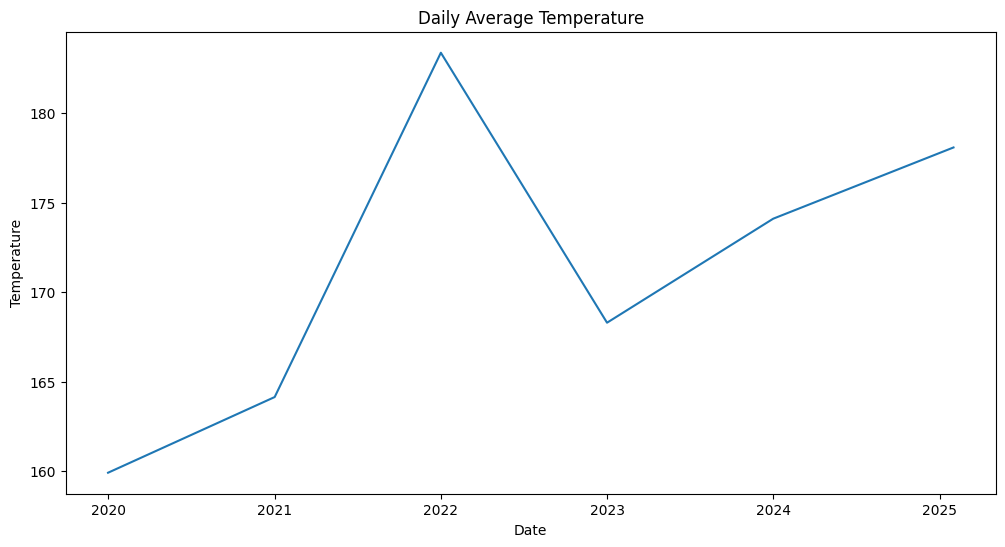

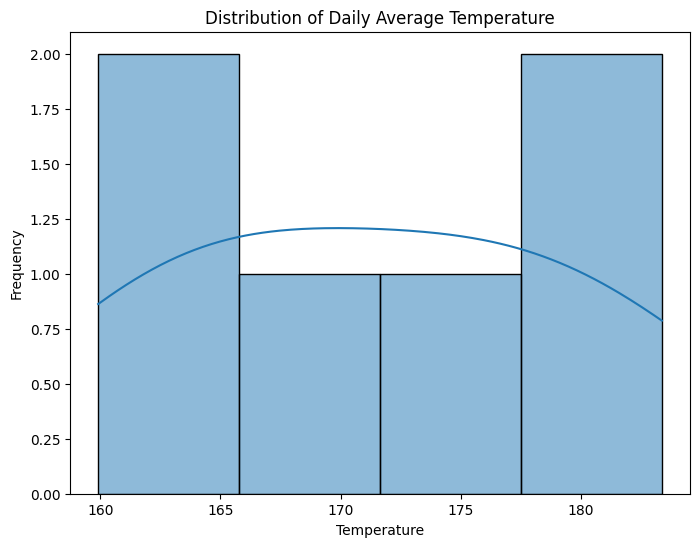

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn
# --- EDA ---
# Descriptive Statistics
print(df_daily.describe())

# Visualizations
plt.figure(figsize=(12, 6))
plt.plot(df_daily['Temperature'])
plt.title('Daily Average Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

# Distribution of Temperature
plt.figure(figsize=(8, 6))
sns.histplot(df_daily['Temperature'], kde=True)
plt.title('Distribution of Daily Average Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Correlation Matrix (if you have multiple features)
# sns.heatmap(df_daily.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

preparing data

Feature Engineering and scalling

In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Feature Engineering (Example - Add dayofweek)
df_daily['dayofweek'] = df_daily.index.dayofweek

# Scaling
scaler = MinMaxScaler()
features = ['Temperature', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'dayofweek']
df_scaled = df_daily.copy()
df_scaled[features] = scaler.fit_transform(df_daily[features])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


data splitting

In [28]:

# Split data into train and test sets
X = df_scaled[features[1:]] # Features (excluding 'Temperature')
y = df_scaled['Temperature'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


training the model

In [29]:
# Create and train the XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1)  # Adjust hyperparameters as needed
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

model evaluation

In [32]:
# Calculate RMSE
rmse = mean_squared_error(y_test, predictions)**0.5
print('RMSE:', rmse)

RMSE: 0.5790753882689804


In [34]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# --- Hyperparameter Tuning using TimeSeriesSplit ---
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Create TimeSeriesSplit object with 3 splits
tscv = TimeSeriesSplit(n_splits=3)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=tscv)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Update the model with the best hyperparameters
model = XGBRegressor(**best_params)
model.fit(X_train, y_train)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
print("Number of rows in df_daily:", df_daily.shape[0])


Number of rows in df_daily: 6


In [43]:
# Choose a small lag window (e.g., 3) because df_daily has only 6 rows.
window = 3

# Create lag features for the past 3 days
for i in range(1, window + 1):
    df_daily[f'lag_{i}'] = df_daily['Temperature'].shift(i)

# Drop rows with NaN values (this will remove the first 3 rows)
df_daily_lag = df_daily.dropna()

print("Data with lag features (using window=3):")
print(df_daily_lag)


Data with lag features (using window=3):
Empty DataFrame
Columns: [Temperature, lag_1, lag_2, lag_3, lag_4, lag_5, lag_6, lag_7, dayofweek]
Index: []
